In [5]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pickle

In [7]:
da=pd.read_csv('test.txt',delimiter='\\t')


X_train=da['Obs']
y_train=da['Temperature']
z_train=da['Humidity']
X_test=np.asarray([72,73,74,75,76,77,78,79])

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(z_train.shape)

X_train=X_train.values.reshape((-1,1))
y_train=y_train.values.reshape((-1,1))
z_train=z_train.values.reshape((-1,1))
X_test=X_test.reshape((-1,1))

poly = PolynomialFeatures(degree=4)
X = poly.fit_transform(X_train)
Xt = poly.fit_transform(X_test)

clf = linear_model.LinearRegression(n_jobs=-1)
TC_model = clf.fit(X, y_train)
pred=TC_model.predict(Xt)
dfg=TC_model.predict(X)
print("Temperature Forecast")
print(pred)

Temperature Forecast
[[31.17825448]
 [31.12704724]
 [31.07757834]
 [31.03012687]
 [30.98497665]
 [30.94241629]
 [30.90273915]
 [30.86624337]]


/home/ec2-user/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Humidity Forecast
[[87.15826649]
 [88.37318598]
 [89.64285921]
 [90.96804796]
 [92.34951401]
 [93.78801915]
 [95.28432515]
 [96.8391938 ]]


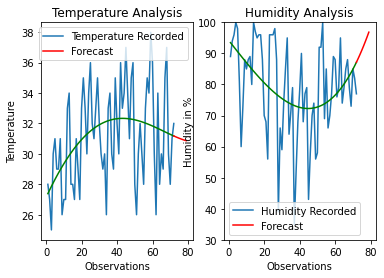

In [8]:
poly1 = PolynomialFeatures(degree=3)
X1 = poly1.fit_transform(X_train)
Xt1 = poly1.fit_transform(X_test)

fg = linear_model.LinearRegression(n_jobs=-1)
HUM_model = fg.fit(X1,z_train)
pred1=HUM_model.predict(Xt1)
dfg1=HUM_model.predict(X1)
print("Humidity Forecast")
print(pred1)


fig=plt.figure()

plt1=fig.add_subplot(121,xlabel='Observations',ylabel='Temperature',title='Temperature Analysis')
plt1.plot(da['Obs'],da['Temperature'],label='Temperature Recorded')
plt1.plot(da['Obs'],dfg,color='g')
plt1.plot(X_test,pred,color='r',label='Forecast')
plt1.legend()


plt2=fig.add_subplot(122,ylim=(30,100),xlabel='Observations',ylabel='Humidity in %',title='Humidity Analysis')
plt2.plot(da['Obs'],da['Humidity'],label='Humidity Recorded')
plt2.plot(da['Obs'],dfg1,color='g')
plt2.plot(X_test,pred1,color='r',label='Forecast')
plt2.legend()

plt.show()

In [9]:
Pkl_Filename = "TC_forecast.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(TC_model, file)
    
Pkl_Filename = "HUM_forecast.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(HUM_model, file)